# Mathematik 2: Polynome

Unter den mathematischen Funktionen nehmen die Polynome eine Sonderstellung ein: Trotz ihrer einfachen Form lassen sich theoretisch alle ("vernünftigen") Funktionen durch Polynome approximieren, was sie auch für die Informatik wichtig macht. Mit Hilfe der Polynomialen Regression lassen sich auch große Datenmengen statistisch beschreiben.

## Was wir von der Schule noch wissen...

Ein allgemeines (reelles) **Polynom** hat die Form 
$$P(x) = a_N x^N + a_{N-1}x^{N-1} + \ldots a_2x^2 + a_1 x + a_0$$

mit reellen Zahlen $a_0,a_1,\ldots,a_n$, die die **Koeffizienten** des Polynoms genannt werden. $N$ heißt dann der **Grad** des Polynoms. Ein Polynom vom Grad 0 ist eine konstante Funktion, ein Polynom vom Grad 1 eine lineare Funktion. Eine **Parabel** ist ein Polynom vom Grad zwei, und Polynome vom Grad 3 werden auch **kubische Parabeln** genannt. Um den Wert eines Polynom an einer Stelle $x$ zu berechnen sind damit lediglich Multiplikationen und Additionen notwendig. Und für diese Operationen stellen Computer bzw. deren Prozessoren entsprechend optimierte Funktionen bereit. 

### Ableitungen von Polynomen

Polynome lassen sich leicht differenzieren, das Ergebnis ist wieder ein Polynom. Da wir wissen, dass die Ableitung von $x^k$ einfach $k x^{k-1}$ ist, folgt 

$$P'(x) = N a_N x^{N-1} + \ldots + 2 a_2 x + a1.$$

### Andere Schreibweise

Um Formeln mit Polynomen kompakter schreiben zu können, und auch aus programmiertechnischen Gründen werden wir Polynome etwas anders als auf der Schule gelernt schreiben. Dazu verwenden wir auch, dass $x^1 = x$ und $x^0 = 1$ ist. Dann gilt:

$$P(x) = a_0 + a_1 x + a_2x^2 + \ldots + a_n x^N = \sum_{k=0}^N a_k x^k.$$

### Algebraische Struktur

Man kann Polynome addieren, mit Konstanten multiplizieren, ja sogar miteinander multiplizieren und dividieren. Polynome haben somit eine ähnliche algebraische Struktur wie gewöhnliche Zahlen, da wir ein Polynom mit seinen Koeffizienten gleichsetzen können. Wir gehen auf der Seite zur Linearen Algebra genauer darauf ein.

### Programmierung von Polynomen

Insbesondere mit Hilfe von NumPy lassen sich Polynome in Python leicht implementieren. Wir werden die folgenden Hilfs-Funktionen öfters gebrauchen. 

Die folgenden Funktionen sind nur in Bezug auf Lesbarkeit optimiert, nicht auf Effizienz. Für optimale Performanz greift man am besten direkt auf die eingebauten Funktionen zu.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
class Polynom:
    """Einige Funktionen zur Erzeugung und Darstellung von Polynomen"""

    def __init__(self,coeff:np.ndarray):
        """Erzeugt ein Polynom mit den Koeffizienten aus a"""
        self.coeff = coeff
        self.p = lambda x: np.sum([c * x**k for k,c in enumerate(self.coeff)])

    def to_text(self):
        """ Ausgabe des Polynoms in Text-Form. """
        comp = []
        text = "P(x) = "
        for n,a in enumerate(self.coeff):   
            c = "{:.3f}".format(a)
            if n > 0:
                c += "x"
            if n > 1:
                c += "^" + str(n)
            comp.append(c)

        comp.reverse()
        for c in comp:
            text += c + " + "
        text = text[:-3]
        return text
    
    def to_latex(self):
        """ Ausgabe des Polynoms in LaTeX-Form. """
        return "$" + self.to_text() + "$"    

    def plot(self,plot,x_min,x_max):
        """ Grafische Ausgabe eines Polynoms """ 
        plot.xlabel('$x$')
        plot.ylabel('$P(x)$')
        plot.title(self.to_latex())
        plot.grid(True)
        xp = np.linspace(x_min,x_max,100)
        yp = [self.p(x) for x in xp]
        #plot.plot([0,0],[np.min(yp),np.max(yp)],c='k')
        plot.plot(xp,yp)
        pass

### Einige einfache Polynome

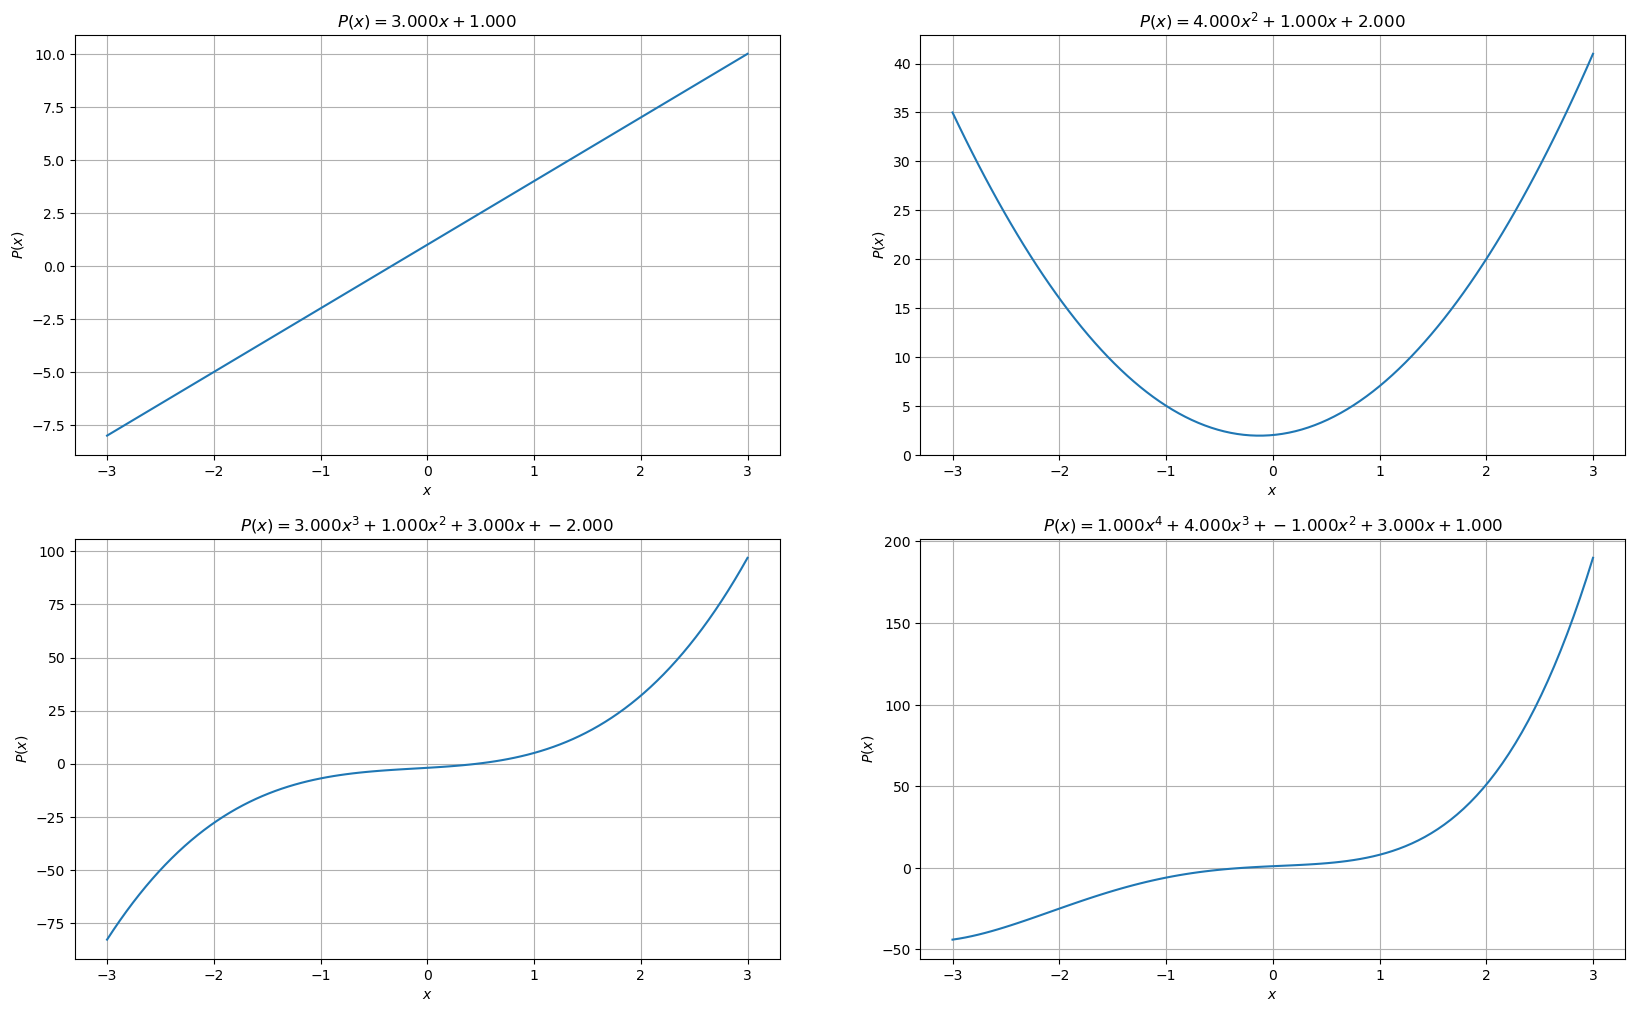

In [3]:
polynome = [Polynom(np.array([1,3])),Polynom(np.array([2,1,4])),Polynom(np.array([-2,3,1,3])),Polynom(np.array([1,3,-1,4,1]))]

plt.figure( figsize=(20,12))
for n,p in enumerate(polynome):
    plot = plt.subplot(2,2,n+1)
    p.plot(plt,-3,3)
